# Analytic Report and Research Proposal

## Abstract

The following report and research proposal has the aim to analyse the data sample provided by IBM Watson on the churn problem in a given telecommunication company and bring the insights from the data analysis. This notebook will guide the reader throuhgt important analytical processes in order to answer the business questions in regards to churn and highlights the findings. 

### The goal and scope of the analysis

Churn has been an important issue for any business, since it directly impacts the market share of a company and its profitability. Predicting the churn and understanding how to work with clients who are about to churn may be very beneficial. For this purpose, we will try to bring the insights from the data that would help define the patterns shared by churning customers and help us understand better what might be a reason for this. 

Based on the data we have, we'll focus primarily on giving insights about the following questions: 
1. When do clients churn? 
2. Who are these people who are churning and how different they are from non-churners? 

In regards to the second question above we'll split the client base into various segments and analyse a few extreme profiles to find out any similarities between churning clients. Also, we're interested to characterize the customers who are happy to stay with the company for very long time and are not prone to churn. Hence, we'll analyse in particular, the following segments:
- Clients who are not churning and have the longest tenure 
- Clients who stayed long with company and eventually churned
- Clients who churned quickly 




## Data set description

We have the client data obtained via IBM Watson from telecommunication companies. We have 7043 rows - unique client IDs - and 21 columns describing demographic characteristics of the customers, services used, payment patterns and their churn status. 

### Limitations 

There might be some limitations of the analisys that are imposed by data. Since there's no timestamp on the life of a client with the company, we cannot surely say when did the client churned. Thus, we might have clients who churned for different reasons at different period of time and due to different behavioral, econolical reasons, etc. Also, we don't have the data on the satisfaction of a client and, thus, we cannot really say if a client, who didn't churn yet, is going to stay with the company soon. 

If the data set would have included the information about competitor and any indication of what were the services that the churned client used after, the results of the analysis would have been more fruitful. In this case, it would be possible to identify the reasons for churning more in-depth. 

Unfortunately, we don't have the information on the region where the data was gathered. The insights of the analysis could be extensively used to characterise the telecom market in that location and serve as a basis for further recommendations to the telecom companies. 



## Research and Analysis 

### Data loading and preprocessing 

Before digging into the analysis, we need to load the data and see what it consists of to make sure that the formatting of the data is suitable for our data analysis. 

In [321]:
#Importing all the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing our dataset
df=pd.read_csv("../Telco_churn_data.csv")
df.head(n=10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


As we see some of the columns have values "1" / "0" instead of "Yes" / "No", we'll unifying the formatting of the columns. After that, we will answer the questions specified in the research. 

In [322]:
#Formatting column "SeniorCitizen" into understandable and more reader-friendly format "Yes"/"No"
df.SeniorCitizen.replace([1, 0], ['Yes', 'No'], inplace=True)

Let's start with the first question.

## 1. When do clients churn? 

To understand the distribution of time when clients used to churn, we'll create a new database of clients who churned and build a histogram of their tenure. 

In [323]:
churning_clients = pd.DataFrame(df[df['Churn'] == 'Yes'])
non_churning_clients = pd.DataFrame(df[df['Churn'] == 'No'])

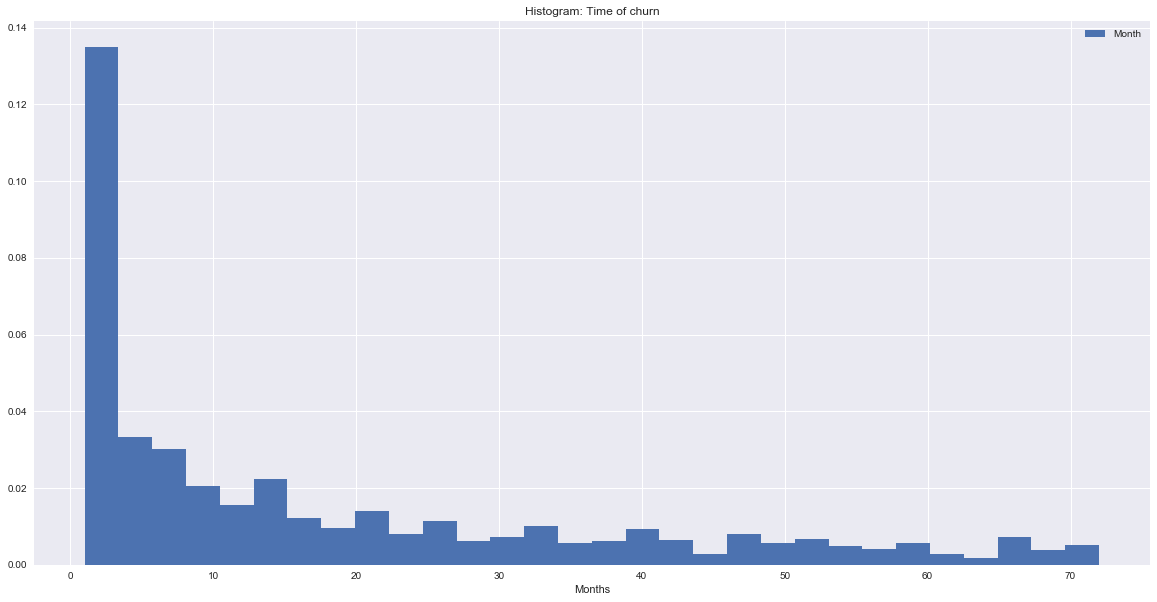

In [335]:
plt.figure(figsize=(20, 10))

plt.hist(churning_clients['tenure'], normed=True, bins = 30, label='Month') 
plt.legend()
plt.title('Histogram: Time of churn')
plt.xlabel('Months')

The clients tend to churn in the beginning of their journey with the company. It can be an indicator that the expectations of clients regarding the service were not met. The churn rates are the highest withing the first 10 months and then the gradually flat. Let's see how many clients churned during each of the first 10 months.

In [325]:
tenure = pd.DataFrame(churning_clients['tenure'].value_counts())
tenure.sort_index(inplace=True)
tenure.columns = ['Number of clients']
tenure.head(n=10)
## barplot of first 10 months?

,Number of clients
1,380
2,123
3,94
4,83
5,64
6,40
7,51
8,42
9,46
10,45


The first month is when the vast majority of churning clients decide to quit the company. 

To get the full pucture of clients churned over the time, we'll group them in intervals of 10 subsequent month and build a barplot.

In [336]:
grouped_tenure = pd.DataFrame([tenure.iloc[0:10].sum(), 
                               tenure.iloc[10:20].sum(), 
                               tenure.iloc[20:30].sum(), 
                               tenure.iloc[30:40].sum(),
                               tenure.iloc[40:50].sum(),
                               tenure.iloc[50:60].sum(),
                               tenure.iloc[60:70].sum(),
                               tenure.iloc[70:].sum()])

new_index = ['1 - 10', '11 - 20', '21 - 30', '31 - 40', '41 - 50','51 - 60','61 - 70','71 - 72']

In [327]:
grouped_tenure.index = new_index 
grouped_tenure.head()

,Number of clients
1 - 10,968
11 - 20,283
21 - 30,174
31 - 40,141
41 - 50,115


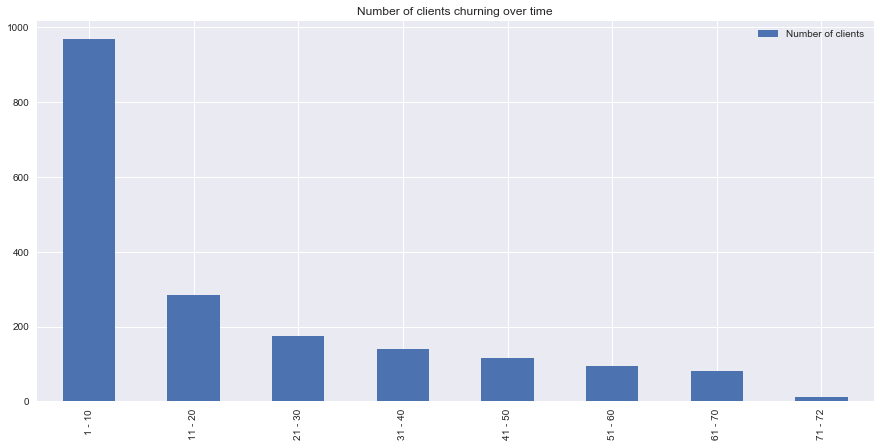

In [328]:
grouped_tenure.plot.bar(figsize=(15, 7), title='Number of clients churning over time')

The churn rate over time falls dramatically: from almost a thousand clients in their first 10 months to less than 100 for the those clients who stayed for over 60 months. 

Let's now look into specific groups of clients, taking into account their churn status, and try to find the common trends among them.

## Who are these people who are churning and how different they are from non-churners?

### First of all, who are the clients who are not churning and have the longest tenure in the company?
We're interested to identify who non-churning clients in terms of their demographics and what king of services they use. We'll take the 25% of longest life clients and conduct the descriptive analysis for this data slice.

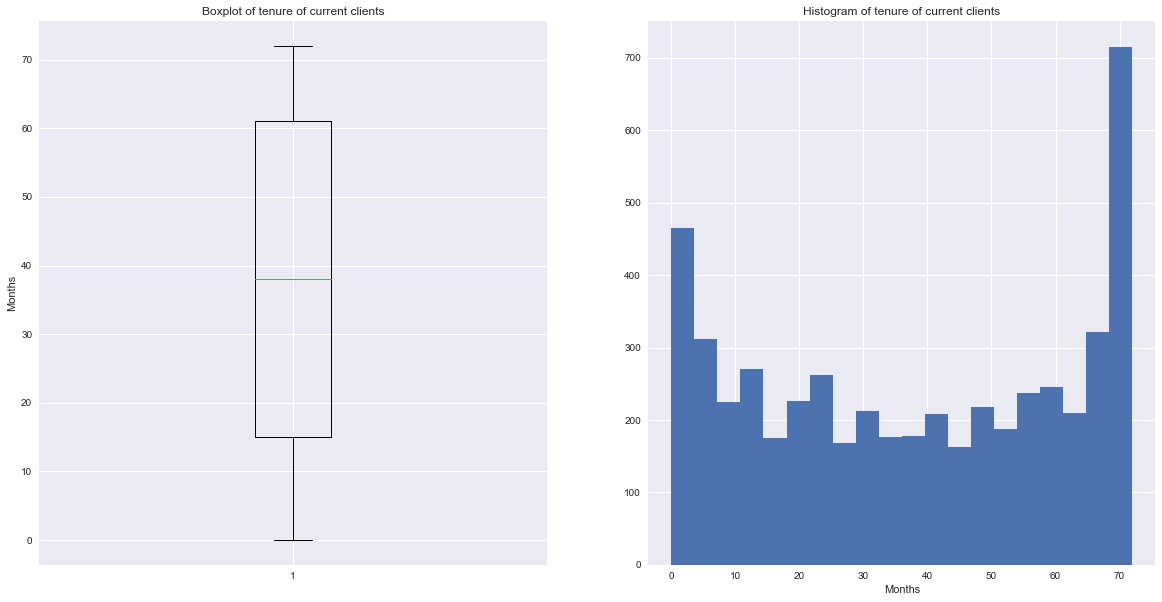

In [329]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.boxplot(non_churning_clients['tenure'])
plt.title('Boxplot of tenure of current clients')
plt.ylabel('Months')

plt.subplot(1, 2, 2)
plt.hist(non_churning_clients['tenure'], bins=20)
plt.title('Histogram of tenure of current clients')
plt.xlabel("Months")

plt.show() 

## ? How to delete 1 on x?

In [330]:
non_churning_clients['tenure'].describe()

count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64

The tenure of the current costumers is spread almost evenly across the time period with two peaks in the beginning and at the end. We can infer that the company has evenly retained clients over time. The peak at the ends of the graph can be explained either by the fact that the first clients were very loyal and didn't churn or probably that many more clients joined the company at its start. 

In [337]:
long_non_churn_clients = pd.DataFrame(non_churning_clients[non_churning_clients["tenure"] > 61])

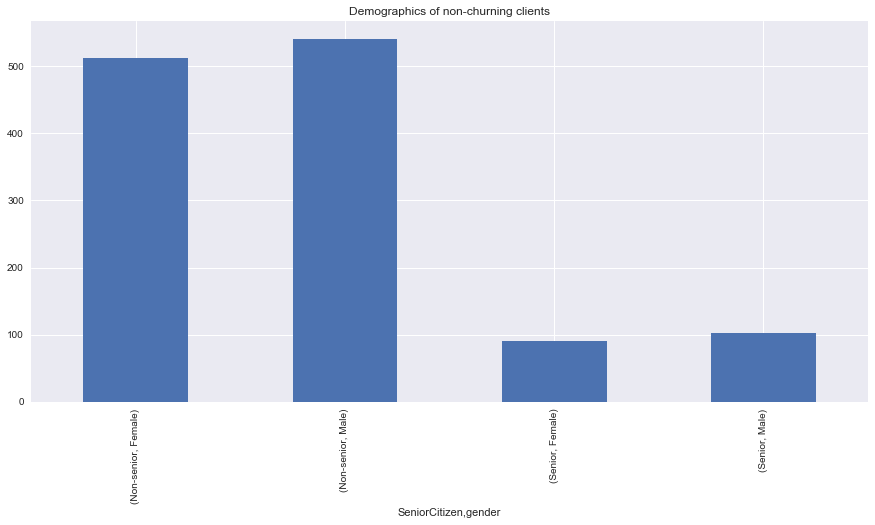

In [339]:
long_non_churn_clients.SeniorCitizen.replace(['Yes', 'No'], ['Senior', 'Non-senior'], inplace=True)
long_non_churn_clients.groupby(['SeniorCitizen', 'gender']).size().plot(kind='bar', 
                                                                        title="Demographics of non-churning clients", figsize=(15, 7))

## Possible further research

The dataset can be used to identify customer segments who are prone to churn, as well as to get the understanding of how various groups of customers use telecommuntication services. Also, this data can be used to identify the services that bring more monetary value to the company, for example clients who tend to have the highest bills. Using this data the company can identify the profile AAA clients and find the areas for improvment to serve these top clients better. 